## Plotting overview of disease dataset mapping for Figure 3

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import os
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import ast

In [2]:
sc.logging.print_header()

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.3.5 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
sc.set_figure_params(
    dpi=200,dpi_save=300,
    fontsize=12,
    frameon=True,
    transparent=True,
)

In [5]:
sns.set_style(style="white")
sns.set_context(context="paper")

In [6]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/disease/compartments/Epi.pooled_disease_with_klennerman_ramnik.log1pcounts.20230221.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 311277 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [8]:
list(adata.obs.organ_unified.unique())

['ileum',
 'caecum',
 'rectum',
 'sigmoid colon',
 'colon',
 'ascending colon',
 'small intestine',
 'stomach',
 'descending colon',
 'transverse',
 'duodenum']

In [9]:
adata = adata[adata.obs.organ_unified.isin(['ileum',
 
 'small intestine',
 'duodenum'])].copy()

In [10]:
adata

AnnData object with n_obs × n_vars = 165793 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [11]:
adata_scanvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/X_scANVI/disease/disease_fine_annot_predict_Epi_SI_adult_method2_20230221_RAMNIK_KLENERMAN_POOLED_scANVIobsm_TApooled.csv.gz',compression='gzip',index_col=0)

In [12]:
adata_scanvi

LV1       LV2       LV3  \
index                                                                    
AAAGATGAGTCCAGGA-4918STDY7273964          0.106777 -1.581919  0.953797   
AAAGATGTCTAACTTC-4918STDY7273964         -0.326288 -1.232465  0.075656   
AAAGCAATCTTGTCAT-4918STDY7273964         -0.206530 -0.884726  0.887867   
AAAGTAGAGAATGTTG-4918STDY7273964          0.674783 -1.860157  0.311393   
AAAGTAGAGTCCAGGA-4918STDY7273964          0.326591 -1.331011  0.892378   
...                                            ...       ...       ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX  1.126156 -1.603150 -1.321975   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX  1.429793  0.794451 -0.054200   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX  0.276539 -3.302082 -0.301166   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX -1.029690 -0.465764 -0.886426   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX  1.529757 -0.017395 -0.224238   

                                               LV4       LV5       LV6  \
index                                                                    
AAAGATGAGTCCAGGA-4918STDY7273964          0.244733  0.150768 -0.013615   
AAAGATGTCTAACTTC-4918STDY7273964          0.489752  0.118587 -0.031781   
AAAGCAATCTTGTCAT-4918STDY7273964          0.531088  0.085285  0.053983   
AAAGTAGAGAATGTTG-4918STDY7273964          1.353063  0.095522  0.023743   
AAAGTAGAGTCCAGGA-4918STDY7273964          1.304705  0.120355  0.138660   
...                                            ...       ...       ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX -1.465220  0.030367 -0.090218   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX  0.303938 -0.004205  0.125666   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX -0.014363  0.031501  0.022452   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX  0.727670  0.015594  0.145017   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX -0.084586  0.042973  0.003435   

                                               LV7       LV8       LV9  \
index                                                                    
AAAGATGAGTCCAGGA-4918STDY7273964          0.126867 -0.056913  1.644769   
AAAGATGTCTAACTTC-4918STDY7273964         -0.025199  0.007295 -1.474205   
AAAGCAATCTTGTCAT-4918STDY7273964          0.057822 -0.096761 -0.067910   
AAAGTAGAGAATGTTG-4918STDY7273964          0.058249 -0.038614 -0.709768   
AAAGTAGAGTCCAGGA-4918STDY7273964          0.115567 -0.089768  1.343268   
...                                            ...       ...       ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX -0.090023  0.085183 -1.068241   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX  0.060234 -0.244193  0.038551   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX  0.071834  0.159822 -1.545251   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX -0.033797 -0.102954 -0.773130   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX  0.026321 -0.160082 -0.684138   

                                              LV10      LV11      LV12  \
index                                                                    
AAAGATGAGTCCAGGA-4918STDY7273964         -0.037695 -0.037948 -2.552821   
AAAGATGTCTAACTTC-4918STDY7273964         -0.006849  0.006761 -2.182468   
AAAGCAATCTTGTCAT-4918STDY7273964         -0.031125 -0.016919 -2.596084   
AAAGTAGAGAATGTTG-4918STDY7273964         -0.016771 -0.030022 -2.739576   
AAAGTAGAGTCCAGGA-4918STDY7273964         -0.103557  0.006986 -2.304565   
...                                            ...       ...       ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX  0.034061 -0.009418 -0.549896   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX  0.011738 -0.006313 -0.609832   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX -0.042196  0.003208 -3.664826   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX  0.028818  0.009299 -0.006245   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX -0.012004  0.060460 -2.207342   

                                              LV13      LV14      LV15  \
index                                                                    
AAAGATGAGTCCAGGA-4918STDY7273964          0.504

In [13]:
adata.obsm['X_scANVI'] = adata_scanvi

In [14]:
adata_meta = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/disease/20230308/scanvi/disease_fine_annot_predict_Epi_SI_adult_method2_20230221_RAMNIK_KLENERMAN_POOLED_TApooled.csv',index_col=0)

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (3,5,6,8,9,11,12,14,64,66,67,69,72,76,77,78,80,82,85,86,87,88,89,94,97,99,100,102,103,105,106,107,108,109,110,111,112,113,115) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
adata_meta

latent_cell_probability  \
index                                                               
AAAGATGAGTCCAGGA-4918STDY7273964                         0.999885   
AAAGATGTCTAACTTC-4918STDY7273964                         0.999927   
AAAGCAATCTTGTCAT-4918STDY7273964                         0.999758   
AAAGTAGAGAATGTTG-4918STDY7273964                         0.999979   
AAAGTAGAGTCCAGGA-4918STDY7273964                         0.999440   
...                                                           ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX                      NaN   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX                      NaN   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX                      NaN   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX                      NaN   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX                      NaN   

                                          latent_RT_efficiency  \
index                                                            
AAAGATGAGTCCAGGA-4918STDY7273964                      2.082940   
AAAGATGTCTAACTTC-4918STDY7273964                      3.495316   
AAAGCAATCTTGTCAT-4918STDY7273964                      1.737549   
AAAGTAGAGAATGTTG-4918STDY7273964                      4.830041   
AAAGTAGAGTCCAGGA-4918STDY7273964                      1.066133   
...                                                        ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX                   NaN   

                                           cecilia22_predH  \
index                                                        
AAAGATGAGTCCAGGA-4918STDY7273964          Epithelial cells   
AAAGATGTCTAACTTC-4918STDY7273964          Epithelial cells   
AAAGCAATCTTGTCAT-4918STDY7273964                   B cells   
AAAGTAGAGAATGTTG-4918STDY7273964          Epithelial cells   
AAAGTAGAGTCCAGGA-4918STDY7273964          Epithelial cells   
...                                                    ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX               NaN   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX               NaN   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX               NaN   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX               NaN   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX               NaN   

                                          cecilia22_predH_prob  \
index                                                            
AAAGATGAGTCCAGGA-4918STDY7273964                      0.999849   
AAAGATGTCTAACTTC-4918STDY7273964                      0.307406   
AAAGCAATCTTGTCAT-4918STDY7273964                      0.802323   
AAAGTAGAGAATGTTG-4918STDY7273964                      0.992046   
AAAGTAGAGTCCAGGA-4918STDY7273964                      0.624124   
...                                                        ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX                   NaN   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX                   NaN   

                                         cecilia22_predH_uncertain  \
index                                                                
AAAGATGAGTCCAGGA-4918STDY7273964                  Epithelial cells   
AAAGATGTCTAACTTC-4918STDY7273964                  Epithelial cells   
AAAGCAATCTTGTCAT-4918STDY7273964                           B cells   
AAAGTAGAGAATGTTG-4918STDY7273964                  Epithelial cells   
AAAGTAGAGTCCAGGA-4918STDY7273964                  Epithelial cells   
...                                                            ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX                   

In [16]:
adata.obs = adata_meta

In [17]:
adata.obs.donor_disease.unique()

array(['PIBD', 'CD', 'control', nan], dtype=object)

In [18]:
adata.obs['disease'] = adata.obs['donor_category'].astype(str) + '_' + adata.obs['donor_disease'].astype(str)

In [19]:
list(adata.obs.disease.unique())

['disease_PIBD',
 'disease_CD',
 'control_CD',
 'control_control',
 'control_nan',
 'celiac_active_nan',
 'celiac_treated_nan']

In [20]:
adata.obs['donor_disease'] = (adata.obs['disease'].map(lambda x:{
'control_control':'control',
 'control_CD':'CD',
 'disease_PIBD':'PIBD',
 'disease_cancer':'cancer',
 'disease_CD':'CD',
 'control_nan':'control',
 'celiac_active_nan':'celiac_active',
 'celiac_treated_nan':'celiac_treated'
    
    }.get(x,x)).astype("category"))

In [21]:
adata.obs.donor_disease.unique()

['PIBD', 'CD', 'control', 'celiac_active', 'celiac_treated']
Categories (5, object): ['CD', 'PIBD', 'celiac_active', 'celiac_treated', 'control']

In [22]:
adata.obs['disease'] = (adata.obs['disease'].map(lambda x:{
'control_control':'control',
 'control_CD':'control',
 'disease_PIBD':'pediatric_IBD',
 'disease_cancer':'cancer_colorectal',
 'disease_CD':'crohns_disease',
 'control_nan':'control',
 'celiac_active_nan':'celiac_active',
 'celiac_treated_nan':'celiac_treated'
    
    }.get(x,x)).astype("category"))

In [23]:
list(adata.obs.disease.unique())

['pediatric_IBD',
 'crohns_disease',
 'control',
 'celiac_active',
 'celiac_treated']

In [24]:
adata.obs['level3_annot'] = adata.obs.fine_predicted_labels

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


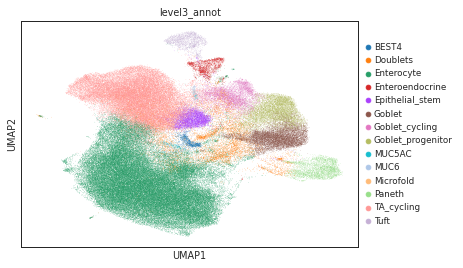

In [25]:
sc.pp.neighbors(adata, use_rep="X_scANVI")
sc.tl.umap(adata)
sc.pl.umap(adata, color=['level3_annot'])

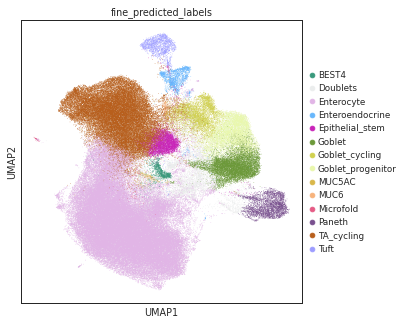

In [26]:
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(adata,color='fine_predicted_labels',palette = ['#39997c',#BEST4
                                                 
                                               #'#d66245',#Colonocyte
                                               #'#9c6b73',#DSC_MUC17
                                               #'#99216b',#DSC_MUC17 cycling
                                                 '#ebeded',#doublets
                                               '#e1b5e6',#enterocyte
                                                '#68b7fc',#enteroendocrine
                                               '#c924b9',#stem
                                               '#6c9939',#goblet
                                               '#d1d14f',#goblet_cycling
                                               '#e9f7ad',#goblet progenitor
                                               
                                               #'#fa6161',#late colonocyte
                                              '#d9b74a',#MUC5AC
                                               '#f7b37c',#MUC6
                                               
                                               '#e55b85',#Microfold
                                               '#79508f',#paneth
                                              #'#ad1a55',#TA
                                               '#b85f1c',#TA cycling
                                               '#9d9dff',#tuft
                                               
                                               
    
    
                                              ],size=1.5,save='Epi_SI_scanviannot_predicted.pdf')

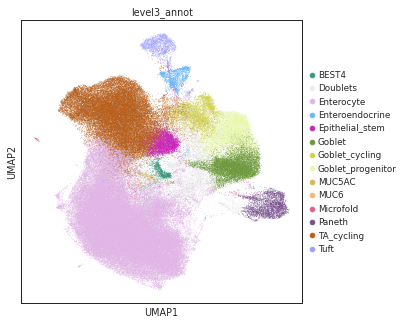

In [27]:
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(adata,color='level3_annot',palette = ['#39997c',#BEST4
                                                 
                                               #'#d66245',#Colonocyte
                                               #'#9c6b73',#DSC_MUC17
                                               #'#99216b',#DSC_MUC17 cycling
                                                 '#ebeded',#doublets
                                               '#e1b5e6',#enterocyte
                                                '#68b7fc',#enteroendocrine
                                               '#c924b9',#stem
                                               '#6c9939',#goblet
                                               '#d1d14f',#goblet_cycling
                                               '#e9f7ad',#goblet progenitor
                                               
                                               #'#fa6161',#late colonocyte
                                              '#d9b74a',#MUC5AC
                                               '#f7b37c',#MUC6
                                               
                                               '#e55b85',#Microfold
                                               '#79508f',#paneth
                                              #'#ad1a55',#TA
                                               '#b85f1c',#TA cycling
                                               '#9d9dff',#tuft
                                               
                                               
    
    
                                              ],size=1.5,save='_epi_pooled_disease_SI_level3annot.pdf')

In [28]:
adata.obs['organ_unified'].cat.reorder_categories(['duodenum','ileum','small intestine'], inplace=True)

<ipython-input-28-e582009687f8>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['organ_unified'].cat.reorder_categories(['duodenum','ileum','small intestine'], inplace=True)


/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


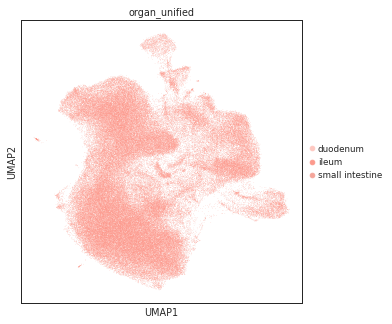

In [29]:
c_organs_unified = [
     
     '#fec8c1', #duodenum
     '#fc9a8d',#ileum
     '#f5a59a', #small intestine
    ]
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(adata, color='organ_unified',palette=c_organs_unified)#,save='_organ_pooled_disease_SI.png',size=1.2)

In [30]:
adata.obs['disease'].cat.categories

Index(['celiac_active', 'celiac_treated', 'control', 'crohns_disease',
       'pediatric_IBD'],
      dtype='object')

In [31]:
adata.obs['disease'].cat.reorder_categories(['control',
 'crohns_disease',
 'pediatric_IBD','celiac_active','celiac_treated'], inplace=True)

<ipython-input-31-912bdeba3687>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['disease'].cat.reorder_categories(['control',


/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


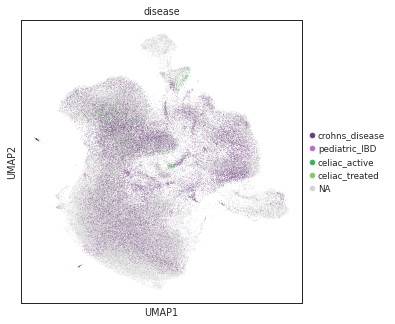

In [32]:
sc.pl.umap(adata,color = 'disease',palette=['#ADD3DD',#control
                                    '#693C78',#crohn's disease
                                            #'#8934B1',#UC
                                            '#B670CD',#PIBD
                                            #'#1C0B86',#colorectal cancer
                                            '#38B257',#celiac_active
                                            '#85C762',#celiac_inactive
                                           ],groups=['crohns_disease',
 'ulcerative_colitis',
 'pediatric_IBD',
 'cancer_colorectal','celiac_active','celiac_treated'])#,size=1.5,save='pooled_healthy_SI_disease.png')

In [33]:
adata.layers['counts'] = adata.X

In [34]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [35]:
marker_genes_dict = { 'BEST4':['BEST4','CA7','GUCA2B','CFTR'],
                     'Colonocyte':['CA1','GPT'],
                     'DCS_MUC17':['MUC17','TFF1','CD55','TM4SF1','DUOX2','DUOXA2'],
                        'Enterocyte':['FABP1','APOA4','PRAP1','PCK1','RBP2','SI'],
                     'Enteroendocrine':['CHGA','PCSK1N','SCT','SCGN','NEUROD1'],
                     'Stem':['LGR5','RGMB','ASCL2','OLFM4'],
                     'Cycling markers':['MKI67','PCNA','TOP2A'],
                     
                     'Goblet':['MUC2','TFF3','FCGBP','ZG16'],
                      'Goblet_progenitor':['SOX4'],
                      'MUC5AC':['MUC5AC','GKN2'],
                     'MUC6':['MUC6','AQP5','BPIFB1','PGC'],
                     'Microfold':['IL2RG','ICAM2','CCL20','CCL23'],
                     'Paneth':['DEFA6','DEFA5','REG3A','PLA2G2A'],
                     
                     'Tuft':['SH2D6','LRMP','MATK','HPGDS']
                     }

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


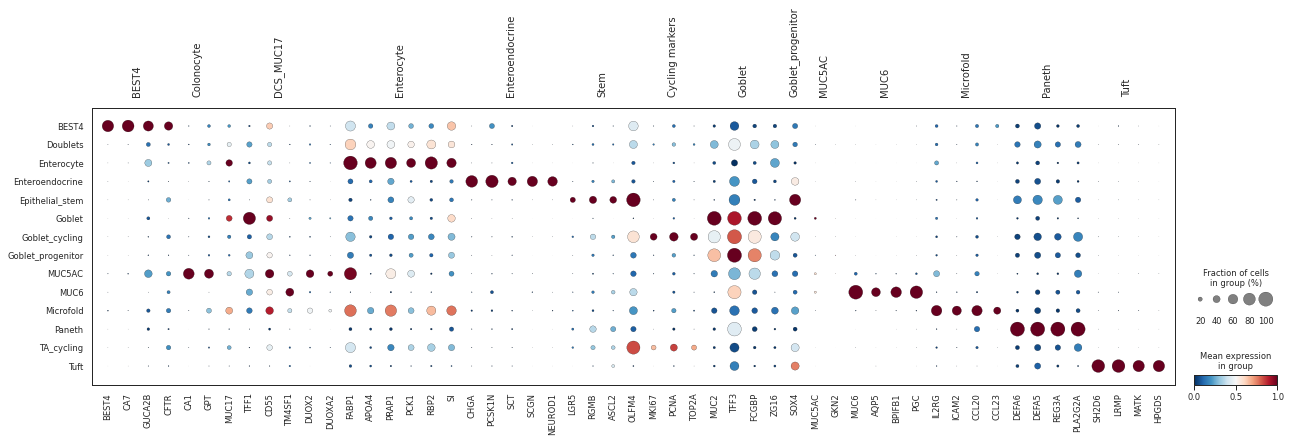

In [36]:
sc.pl.dotplot(adata,var_names=marker_genes_dict,groupby='fine_predicted_labels',color_map='RdBu_r', standard_scale='var')#,save='_epi_SI_pooled_disease_markergenes.png')

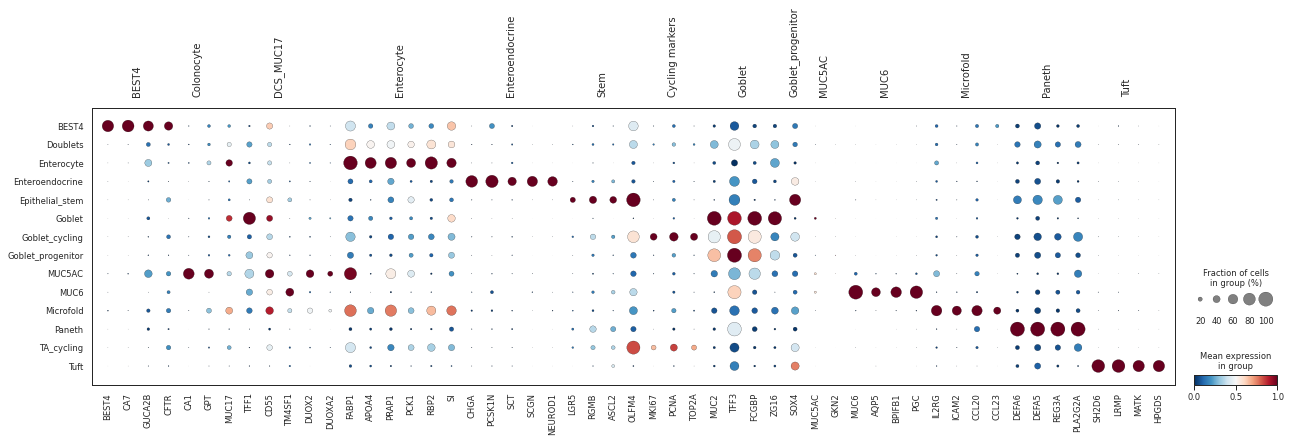

In [37]:
sc.pl.dotplot(adata,var_names=marker_genes_dict,groupby='fine_predicted_labels',color_map='RdBu_r', standard_scale='var',save='_epi_SI_pooled_disease_markergenes.pdf')

In [38]:
uncert = adata.obs[['fine_predicted_labels','fine_predicted_labels_uncertainty']] 

In [39]:
uncert

fine_predicted_labels  \
index                                                            
AAAGATGAGTCCAGGA-4918STDY7273964                Goblet_cycling   
AAAGATGTCTAACTTC-4918STDY7273964                    TA_cycling   
AAAGCAATCTTGTCAT-4918STDY7273964                    TA_cycling   
AAAGTAGAGAATGTTG-4918STDY7273964                Goblet_cycling   
AAAGTAGAGTCCAGGA-4918STDY7273964             Goblet_progenitor   
...                                                        ...   
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX       Enteroendocrine   
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX            Enterocyte   
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX       Enteroendocrine   
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX            Enterocyte   
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX            TA_cycling   

                                          fine_predicted_labels_uncertainty  
index                                                                        
AAAGATGAGTCCAGGA-4918STDY7273964                               5.999911e-02  
AAAGATGTCTAACTTC-4918STDY7273964                               5.960464e-08  
AAAGCAATCTTGTCAT-4918STDY7273964                               1.999623e-02  
AAAGTAGAGAATGTTG-4918STDY7273964                               3.800201e-01  
AAAGTAGAGTCCAGGA-4918STDY7273964                               3.995941e-01  
...                                                                     ...  
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX                       0.000000e+00  
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX                       2.000485e-01  
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX                       5.990762e-01  
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX                       2.800021e-01  
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX                       1.998407e-02  

[165793 rows x 2 columns]

In [40]:
#calculate 90th percentile to use as cut off for uncertain cells
p = np.percentile(uncert['fine_predicted_labels_uncertainty'], 90) # return 90th percentile
print(p)

0.379987895488739


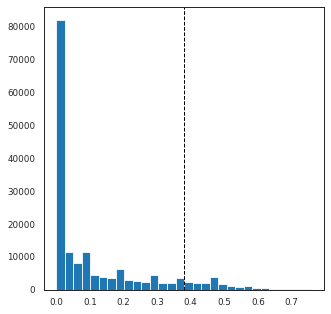

In [41]:
#plot uncertainty distribution
plt.hist(uncert['fine_predicted_labels_uncertainty'], bins=30)
plt.axvline(x=p, color='black', linestyle='dashed', linewidth=1)
plt.savefig('Epi_SI_scanviannot_uncertdist.pdf', format='pdf')
plt.show()

In [42]:
uncert['fine_predicted_labels'] = uncert['fine_predicted_labels'].cat.add_categories('Unknown')

<ipython-input-42-905f2ed234d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncert['fine_predicted_labels'] = uncert['fine_predicted_labels'].cat.add_categories('Unknown')


In [43]:
#mark cells are unknown based on cut off of 90th percentile rounded to the nearest second decimal
uncert.loc[uncert["fine_predicted_labels_uncertainty"] > 0.38, "fine_predicted_labels"] = "Unknown"

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [44]:
uncert['fine_predicted_labels'].value_counts()

Enterocyte           80137
TA_cycling           33722
Unknown              16383
Goblet                8421
Goblet_progenitor     5902
Doublets              5514
Goblet_cycling        3900
Paneth                3369
Epithelial_stem       3343
Enteroendocrine       1794
Tuft                  1723
BEST4                 1071
MUC5AC                 249
Microfold              134
MUC6                   131
Name: fine_predicted_labels, dtype: int64

In [45]:
adata.obs['fine_predicted_labels_uncertflagged'] = uncert['fine_predicted_labels']

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


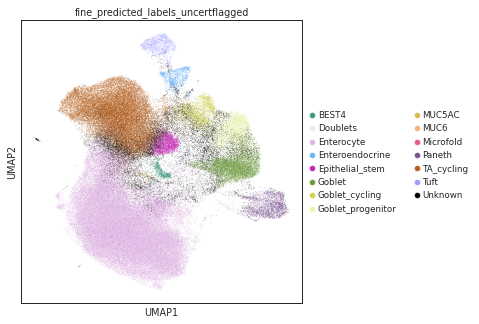

In [46]:
sc.pl.umap(adata,color=['fine_predicted_labels_uncertflagged'], palette=['#39997c',#BEST4
                                                 
                                               
                                                 '#ebeded',#doublets
                                               '#e1b5e6',#enterocyte
                                                '#68b7fc',#enteroendocrine
                                               '#c924b9',#stem
                                               '#6c9939',#goblet
                                               '#d1d14f',#goblet_cycling
                                               '#e9f7ad',#goblet progenitor
                                               
                                               
                                              '#d9b74a',#MUC5AC
                                               '#f7b37c',#MUC6
                                               
                                               '#e55b85',#Microfold
                                               '#79508f',#paneth
                                              #'#ad1a55',#TA
                                               '#b85f1c',#TA cycling
                                               '#9d9dff',#tuft
                                                '#000000',#unknown
                                                                         
                                               
                                               
    
    
                                              ],save='Epi_SI_scanviannot_uncert.pdf')

In [47]:
annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_annot/resolved_annot/epi_SI_disease_annot.csv',index_col=0)

In [48]:
adata.obs['fine_predicted_labels_resolved'] = annot.fine_predicted_labels_resolved

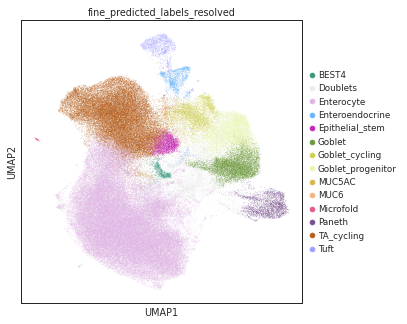

In [49]:
sc.pl.umap(adata,color=['fine_predicted_labels_resolved'], palette=['#39997c',#BEST4
                                                 
                                               
                                                 '#ebeded',#doublets
                                               '#e1b5e6',#enterocyte
                                                '#68b7fc',#enteroendocrine
                                               '#c924b9',#stem
                                               '#6c9939',#goblet
                                               '#d1d14f',#goblet_cycling
                                               '#e9f7ad',#goblet progenitor
                                               
                                               
                                              '#d9b74a',#MUC5AC
                                               '#f7b37c',#MUC6
                                               
                                               '#e55b85',#Microfold
                                               '#79508f',#paneth
                                              #'#ad1a55',#TA
                                               '#b85f1c',#TA cycling
                                               '#9d9dff',#tuft
                                                '#000000',#unknown
                                                                         
                                               
                                               
    
    
                                              ],save='Epi_SI_scanviannot_resolved.pdf')

In [50]:
colors={
    'Doublets':'#ebeded',
    'EC_venous': '#2a4858',
  'Mast': '#826e91',
  'EC_capillary': '#855f9a',
  'DC_cDC1': '#8c543f',
  'Monocyte': '#5baf07',
  'DC_cDC2': '#cfdb65',
  'Basal': '#727271',
  'Treg_IL10': '#e5c510',
  'Crypt_fibroblast_PI16': '#bd7879',
  'Macrophage': '#486626',
  'Vascular_smooth_muscle': '#1E4147',
  'Lamina_propria_fibroblast_ADAMDEC1': '#e95e50',
  'Epithelial_cycling_G2M': '#ff3c4b',
  'Keratinocyte_stratified': '#EDD3E0',
  'Trm/em_CD8': '#256b87',
  'Pericyte': '#437356',
  'Oral_mucosa_fibroblast': '#303267',
  'Macrophage_MMP9': '#a5f002',
  'EC_lymphatic': '#999999',
  'Rectum_fibroblast': '#522e25',
  'Trm_Th17': '#1e093f',
  'DC_migratory': '#e6a519',
  'Epithelial_cycling_S': '#ff8433',
  'Trm_CD4': '#8107ed',
  'NK_CD16': '#0c1e0e',
  'Macrophage_LYVE1': '#8fd9d0',
  'Trm_CD8': '#2844c1',
  'Macrophage_TREM2': '#42c7ac',
  'Keratinocyte_inflammatory': '#E0AC9D',
  'Tnaive/cm_CD4': '#9c53bc',
  'DC_pDC': '#bdb197',
  'Villus_fibroblast_F3': '#d64582',
  'EC_arterial_2': '#ca6092',
  'EC_arterial_1': '#fa6e6e',
  'gdT': '#3fafb5',
  'B_memory': '#a33c22',
  'T/NK_cycling': '#c260ff',
  'Immune_recruiting_pericyte': '#AAC789',
  'MAIT': '#21b796',
  'ILC3': '#778c00',
  'Melanocyte': '#886F61',
  'Tfh_naive': '#5e3c55',
  'Keratinocyte_outer': '#BF7A9C',
  'EC_cycling': '#fac06e',
  'Tnaive/cm_CD8': '#5ca4ce',
  'NK_CD56bright': '#3f8c08',
  'B_naive': '#9b0319',
  'B_preB': '#8a4682',
  'Treg': '#f98261',
  'B_proB': '#d34794',
  'B_plasmablast': '#9e53db',
  'B_plasma_IgG': '#632f17',
  'Megakaryocyte/platelet': '#c730aa',
  'TA_cycling': '#b85f1c',
  'Mono/neutrophil_MPO': '#2a497a',
  'B_plasma_IgA1': '#f76c56',
  'Macrophage_CD5L': '#caf9cf',
  'Tfh': '#5e0b30',
  'Oesophagus_fibroblast': '#63A0C0',
  'B_plasma_IgA2': '#d6558d',
  'gdT_naive': '#26daf2',
  'B_GC_I': '#db9602',
  'B_plasma_IgM': '#c66d31',
  'DC_langerhans': '#c7a642',
  'Fibroblast_reticular': '#f0c134',
  'B_GC_II': '#e2d138',
  'Follicular_DC': '#f0982c',
  'Microfold': '#e55b85',
  'Enterocyte': '#e1b5e6',
  'Epithelial_stem': '#c924b9',
  'MUC5AC': '#d9b74a',
  'MUC6': '#f7b37c',
  'Cycling': '#ff8433',
  'Pareital': '#d45f80',
  'Enteroendocrine_MX': '#292663',
  'Myofibroblast': '#CCAE91',
  'Glial_2': '#0D6986',
  'Enteric_neural_crest_cycling': '#DBA507',
  'Enterochromaffin': '#22517a',
  'Chief': '#c95340',
  'Glial/Enteric_neural_crest': '#a8c545',
  'Enteroendocrine_G': '#2f3f4d',
  'Neuroblast': '#c50637',
  'Goblet_progenitor': '#e9f7ad',
  'Goblet': '#6c9939',
  'Enteroendocrine': '#68b7fc',
  'Erythrocytes': '#0e539c',
  'Enteroendocrine_X': '#7292ad',
  'Glial_3': '#053240',
  'Goblet_cycling': '#d1d14f',
  'BEST4': '#39997c',
  'Tuft': '#9d9dff',
  'Paneth': '#79508f',
  'Serous': '#C9DE55',
  'Mucous': '#67cc8e',
  'Duct': '#7D9100',
  'Seromucous': '#ACEBAE',
  'Myoepithelial': '#572300',
  'Ionocytes': '#9d9dff',
  'Colonocyte': '#d66245',
  'Mature_colonocyte': '#fa6161',
  'Mesoderm_2': '#b4793b',
  'Branch_A_inhibtory_motor_neuron': '#a39bcb',
  'SMC_PPLP2': '#d4d4e8',
  'Cycling_fibroblast': '#d65151',
  'ICC': '#69479b',
  'Branch_B_excitatory_motor_neuron': '#496695',
  'SMC_CAPN3': '#968dc6',
  'Mesoderm_1': '#663818',
  'Branch_B_primary_afferent_neuron': '#909134',
  'Proximal_progenitor_DUO/JEJ': '#fac219',
  'SMC_CAPN3_cycling': '#76738e',
  'Glial_1': '#8EC7D2',
  'Branch_A_primary_afferent_neuron': '#27bdbf',
  'Branch_A_interneuron': '#67608a',
  'NTS': '#baada4',
  'Proximal_progenitor_ILE': '#8f6e0d',
  'Enteroendocrine_progenitor': '#aeebdf',
  'Mesothelium': '#8F6592',
  'Distal_progenitor': '#dbc697',
  'Angiogenic_pericyte': '#308587',
  'Eosinophil/basophil': '#8b4eba',
  'CLDN10': '#706d65',
  'Distal_progenitor_PRAC1': '#8f8161',
  'Immature_pericyte': '#90c496',
  'Mesenchymal_LTO': '#f7eb59',
  'Gastric_fetal_epithelial': '#a01160',
  'DCS_MUC17_cycling': '#99216b',
  'DCS_MUC17': '#9c6b73',
  'Gland_basal': '#404040',
  'Gland_fetal': '#168039',
  'Basal_cycling': '#d1bf82',
  'Keratinocyte_fetal': '#d8306e',
  'Gland_duct': '#7D9100',
  'Gland_mucous': '#67cc8e',
  'Myoblast/myocyte': '#e2798d',
  'Unknown': '#000000'}

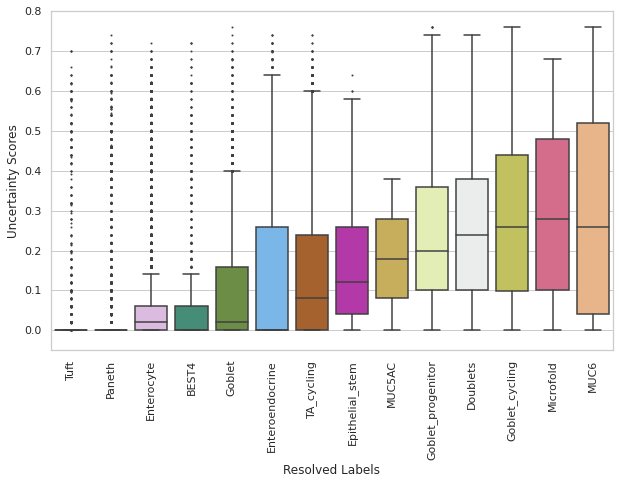

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but seaborn can enhance the style

# Assuming adata is your AnnData object

# Combine the two variables into a DataFrame for easier plotting
data_to_plot = adata.obs[['fine_predicted_labels_uncertainty', 'fine_predicted_labels_resolved']]

# Use seaborn for better styling (optional)
sns.set(style="whitegrid")

mean_uncertainty = data_to_plot.groupby('fine_predicted_labels_resolved')['fine_predicted_labels_uncertainty'].mean()

# Sort the categories based on mean uncertainty
sorted_categories = mean_uncertainty.sort_values().index

# Create a box and whisker plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.boxplot(x='fine_predicted_labels_resolved', y='fine_predicted_labels_uncertainty', data=data_to_plot,palette=colors,order=sorted_categories,flierprops=dict(marker='o', markerfacecolor='gray', markersize=1))

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Resolved Labels')
plt.ylabel('Uncertainty Scores')
ax.set_ylim(-0.05, 0.8)

# Save the plot as a PDF file
plt.savefig('Epi_SI_boxplot_uncertainty_scores.pdf', format='pdf')

# Show the plot
plt.show()

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


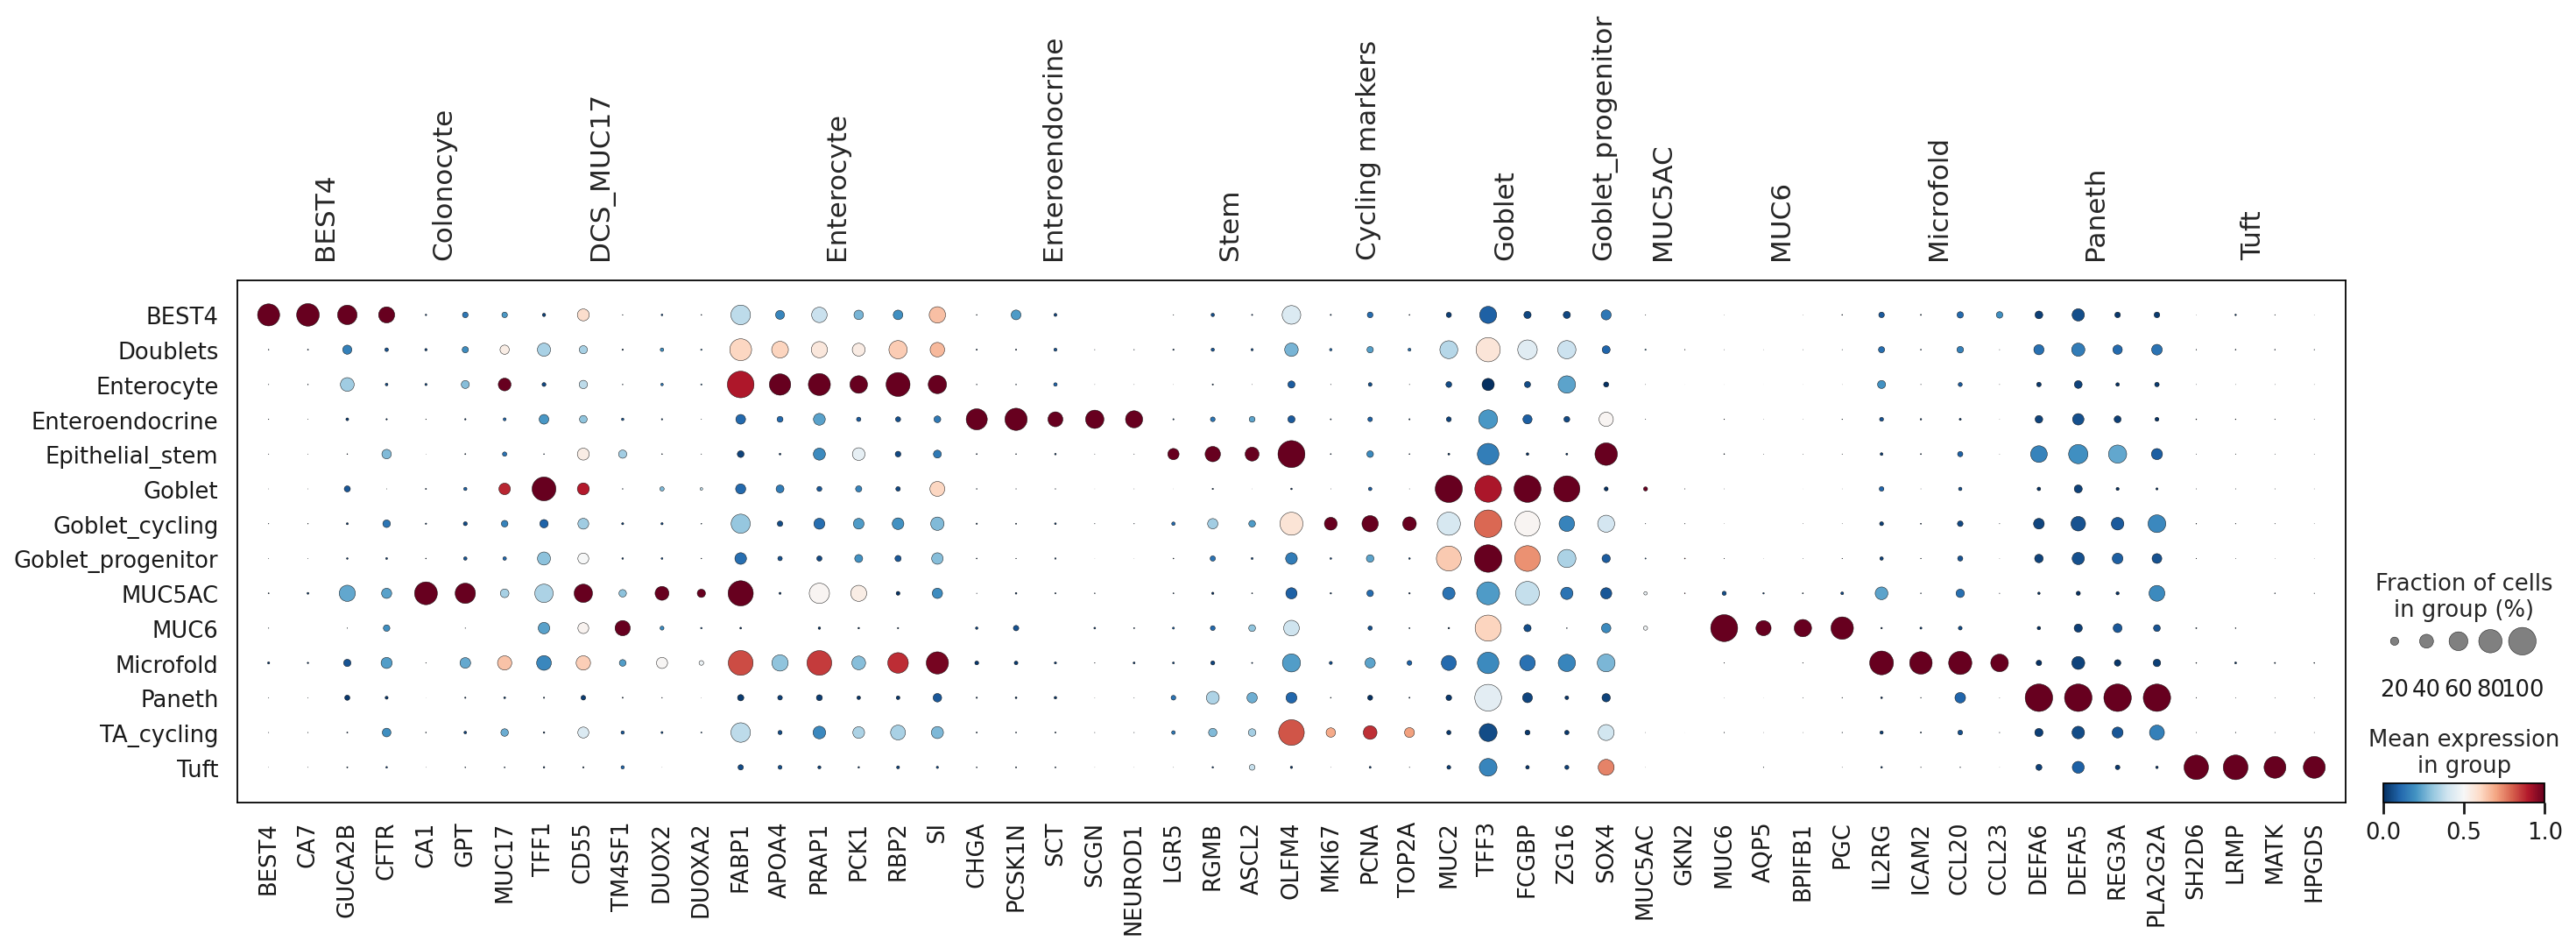

In [52]:
sc.set_figure_params(dpi_save = 300)
sc.pl.dotplot(adata,var_names=marker_genes_dict,groupby='fine_predicted_labels_resolved',color_map='RdBu_r', standard_scale='var',save='Epi_SI_scanviannot_resvoledmarkers.pdf')

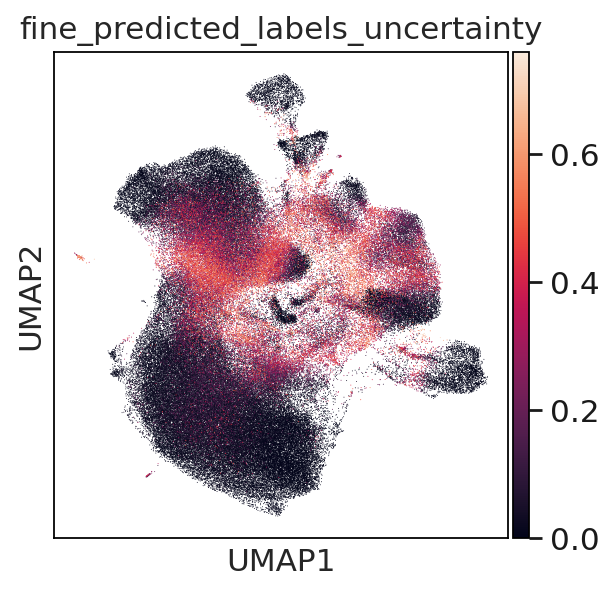

In [53]:
sc.pl.umap(adata,color='fine_predicted_labels_uncertainty',save='Epi_SI_scanviannot_uncertainty.pdf')

In [54]:
#related to revisions point 2.10 "Have you done differential gene expression analysis of the unknonw cells versus the annotated cells in their cluster?"

In [55]:
adata

AnnData object with n_obs × n_vars = 165793 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [56]:
adata.obs['unknown_clusterlabel'] = adata.obs['fine_predicted_labels_uncertflagged'].astype(str) + '_' + adata.obs['fine_predicted_labels_resolved'].astype(str)

In [57]:
adata.obs['unknown_clusterlabel'].value_counts()

Enterocyte_Enterocyte                  80137
TA_cycling_TA_cycling                  33722
Goblet_Goblet                           8421
Goblet_progenitor_Goblet_progenitor     5902
Doublets_Doublets                       5514
Unknown_TA_cycling                      4726
Unknown_Enterocyte                      4022
Goblet_cycling_Goblet_cycling           3900
Paneth_Paneth                           3369
Epithelial_stem_Epithelial_stem         3343
Unknown_Goblet_cycling                  2016
Unknown_Doublets                        1944
Enteroendocrine_Enteroendocrine         1794
Tuft_Tuft                               1723
Unknown_Goblet_progenitor               1712
BEST4_BEST4                             1071
Unknown_Goblet                           728
Unknown_Enteroendocrine                  495
Unknown_Paneth                           280
MUC5AC_MUC5AC                            249
Microfold_Microfold                      134
MUC6_MUC6                                131
Unknown_BE

In [58]:
adata.X.max()

9.02377

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/tools/_rank

         Falling back to preprocessing with `sc.pp.pca` and default params.


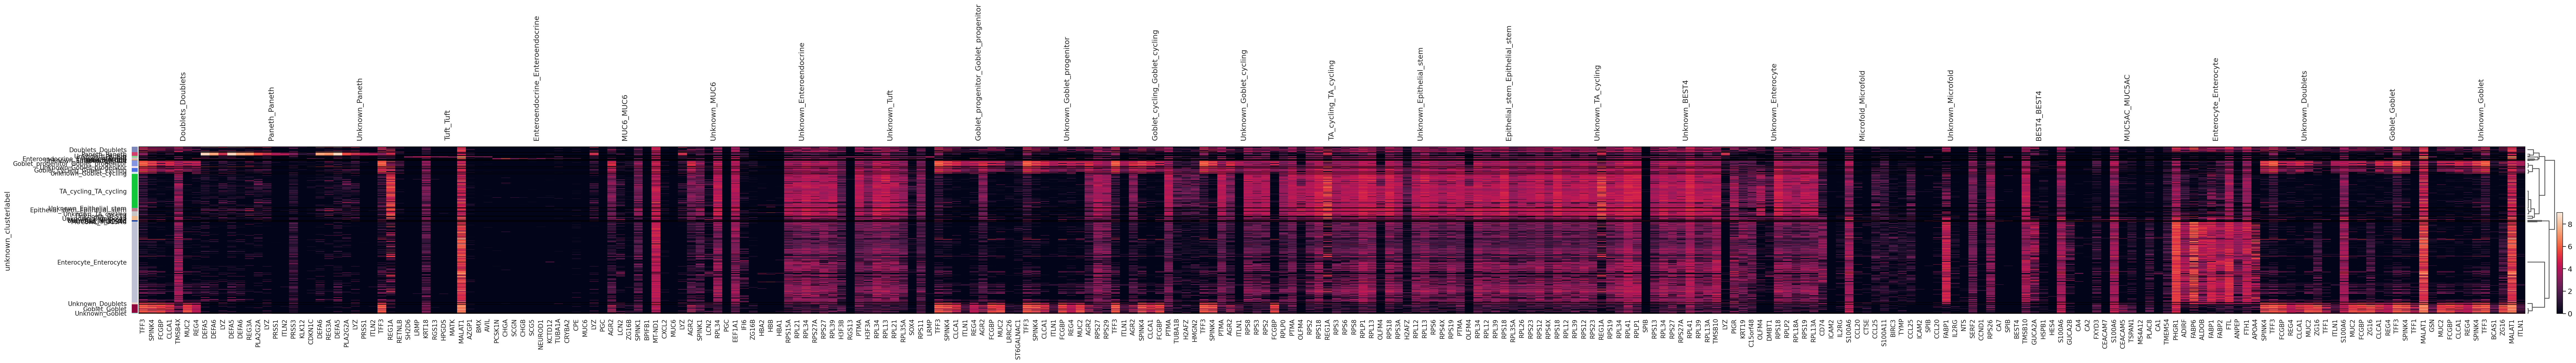

In [60]:
sc.tl.rank_genes_groups(adata, 'unknown_clusterlabel', method='wilcoxon')
sc.pl.rank_genes_groups_heatmap(adata, show_gene_labels=True)

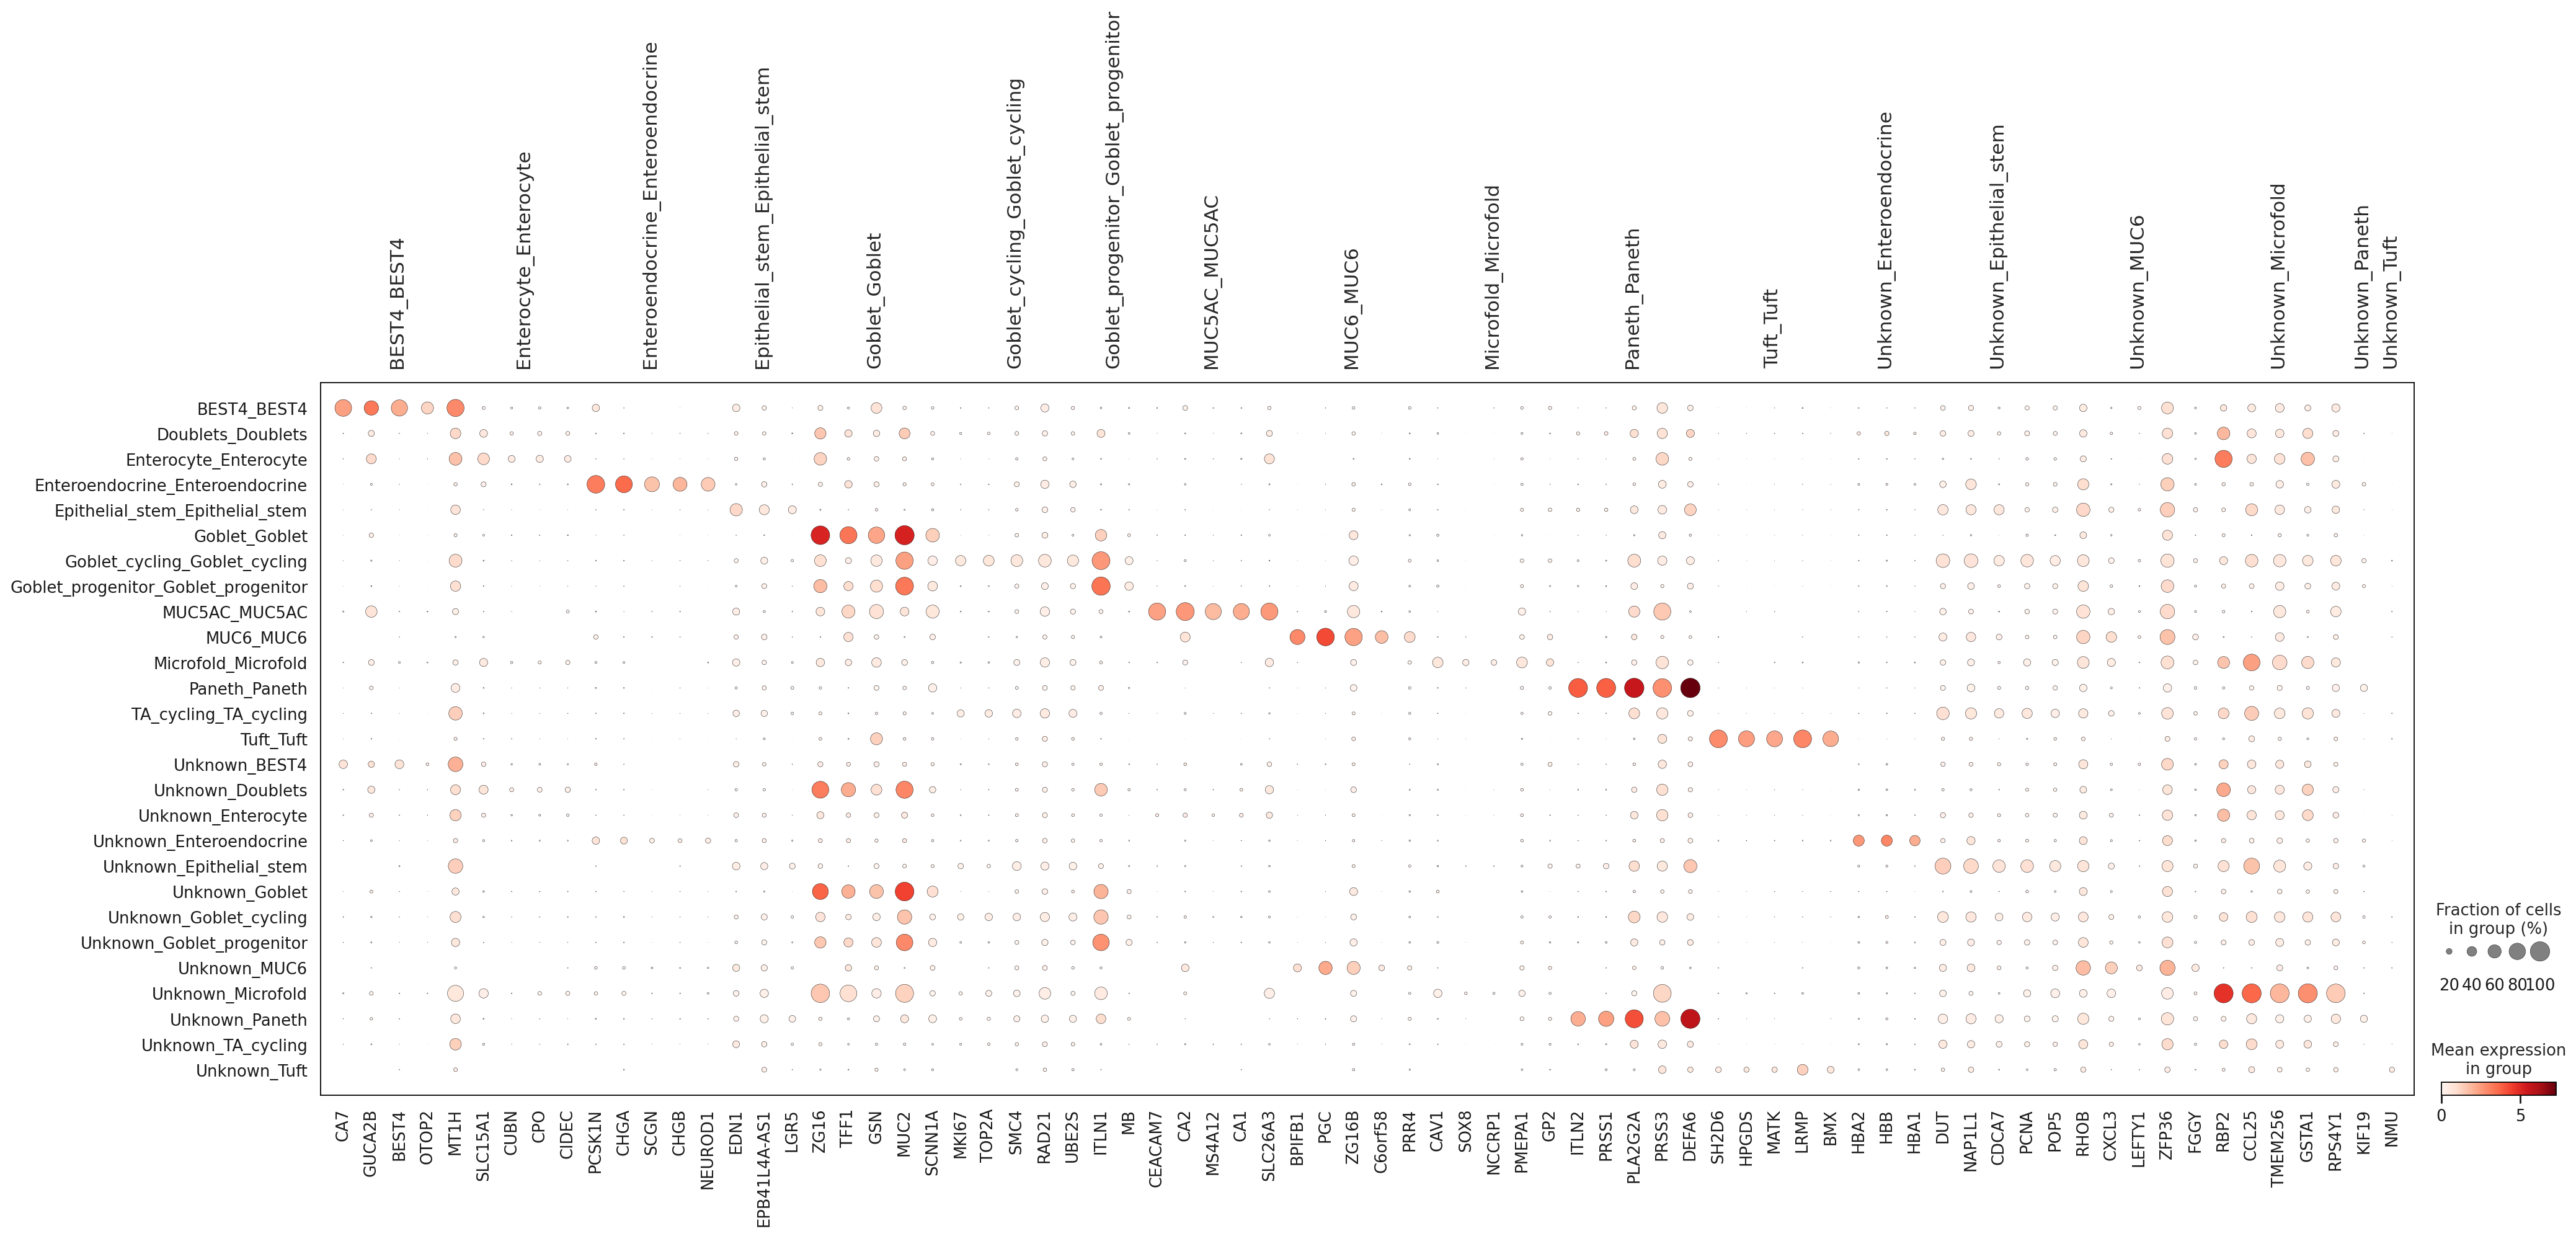

In [61]:
import sys
sys.path.append("/home/jovyan/ao15/Megagut/")
from re5_combine import *
adata.raw = adata.copy()
mkst = calc_marker_stats(adata, groupby="unknown_clusterlabel")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(adata, groupby='unknown_clusterlabel', mks=mks)

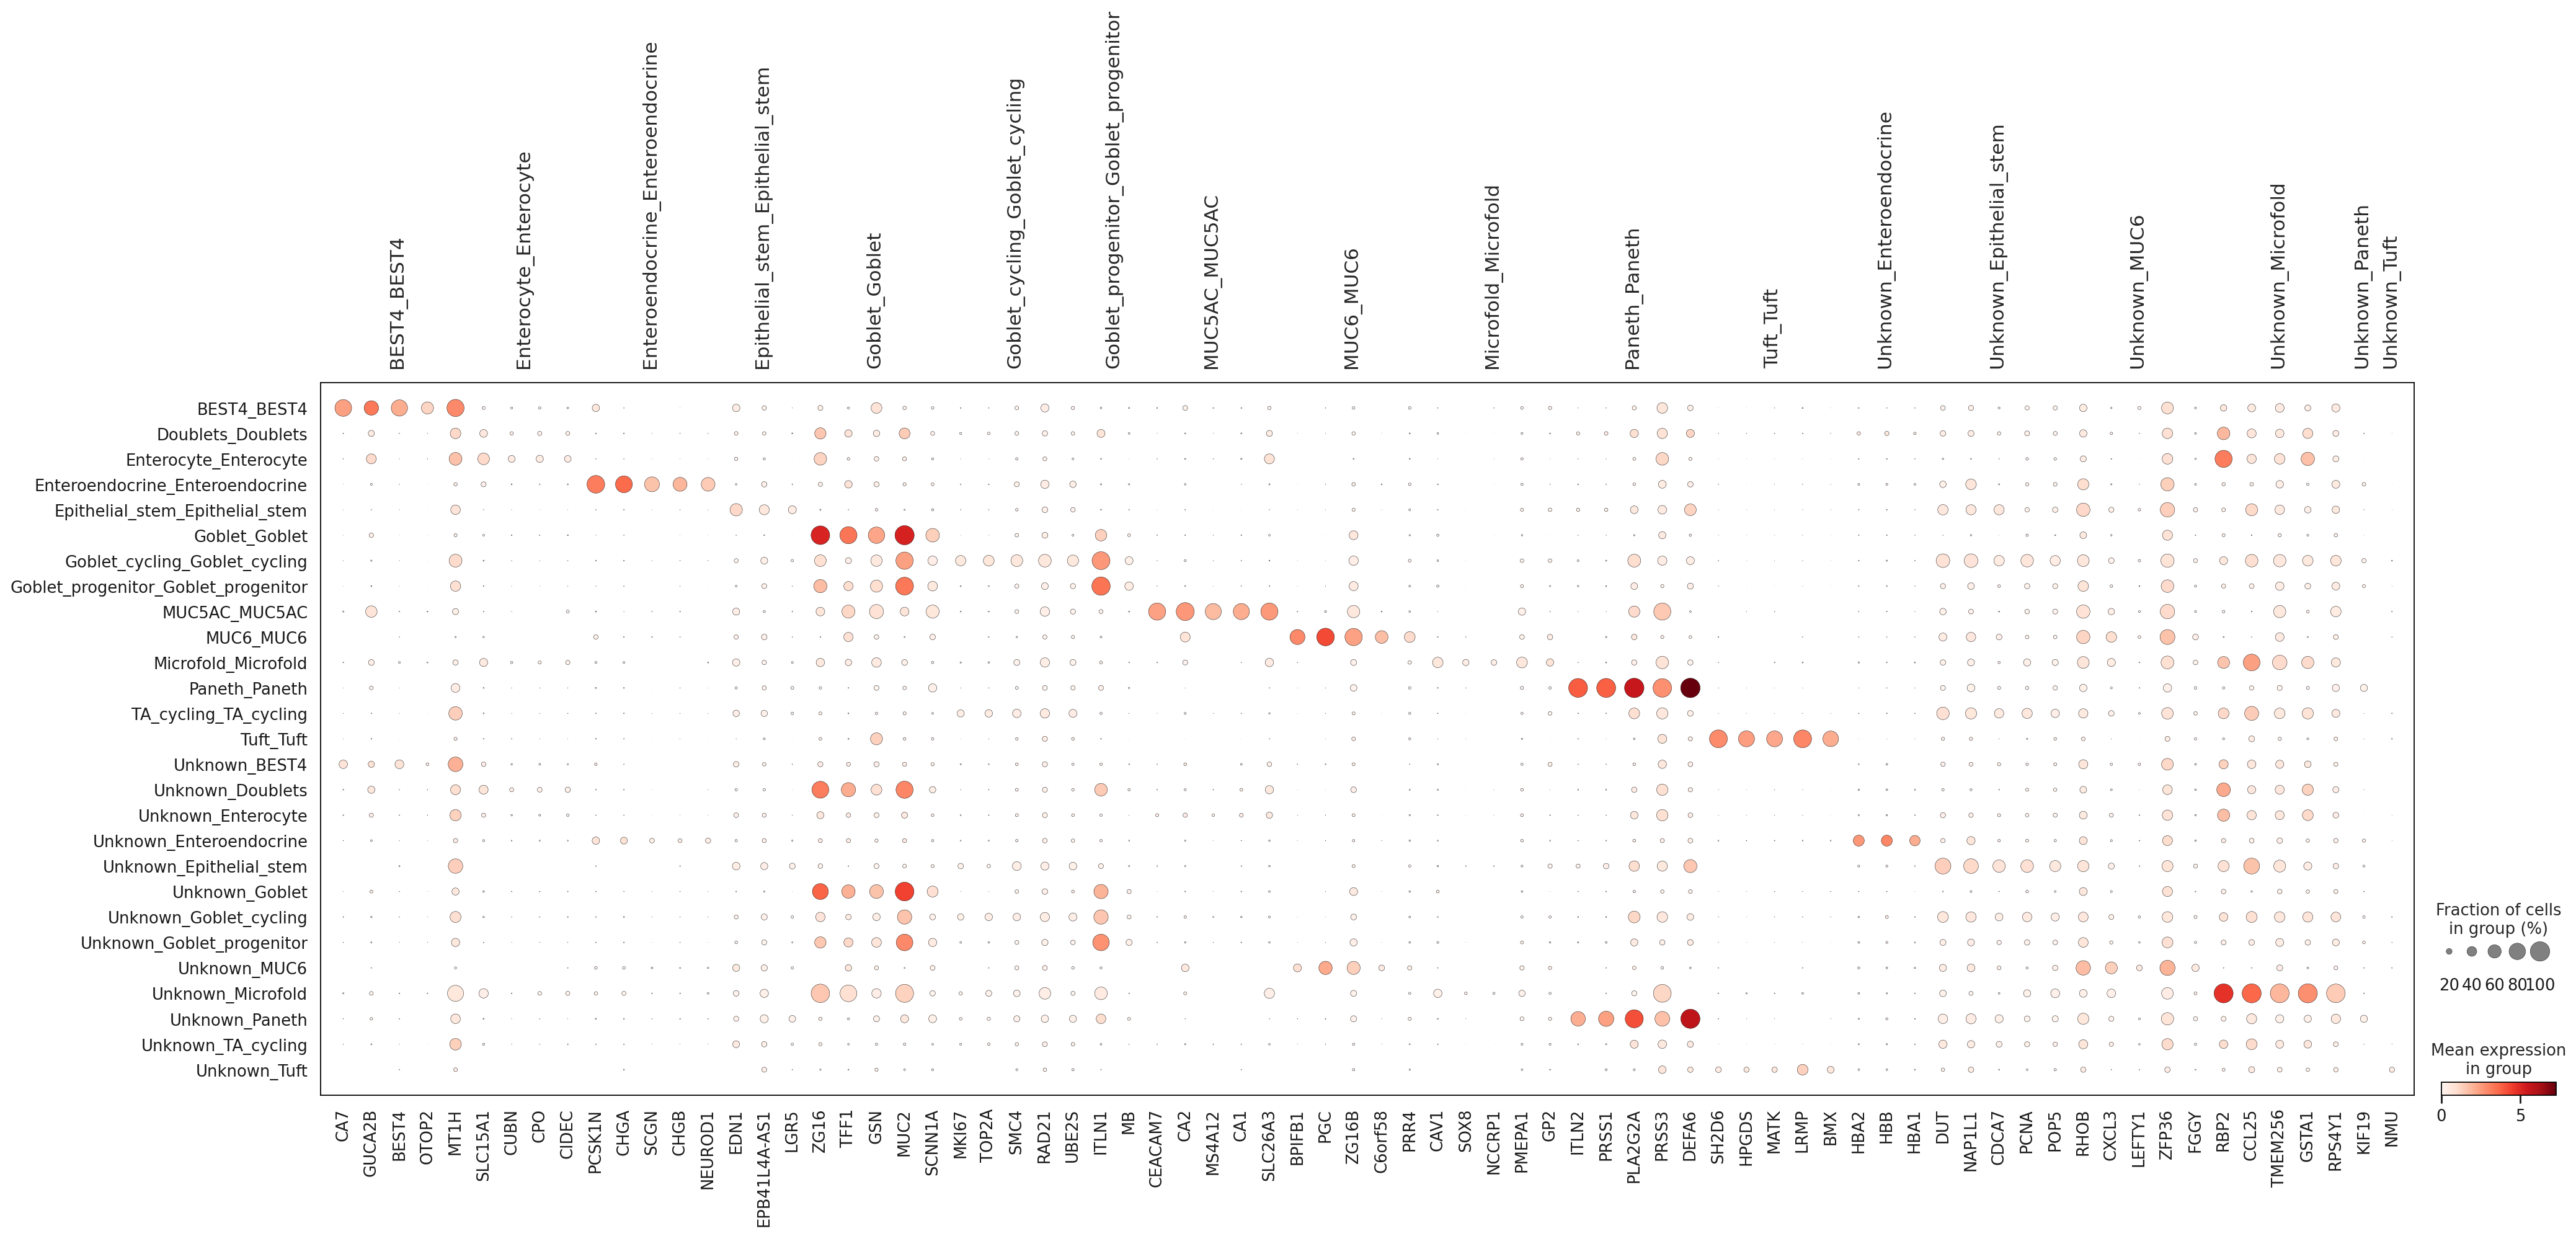

In [62]:
plot_markers(adata, groupby='unknown_clusterlabel', mks=mks,save='Epi_SI_unknown_specificDGE.pdf')